In [1]:
print("Hello World")


Hello World


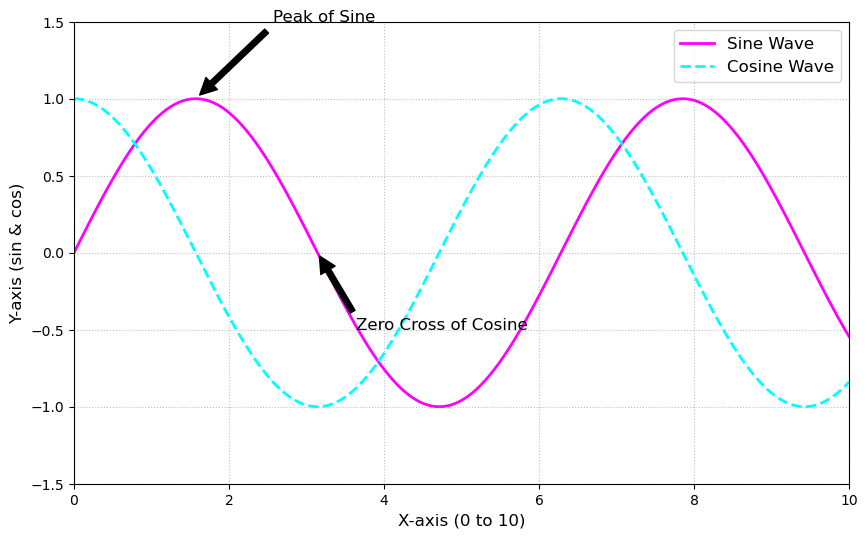

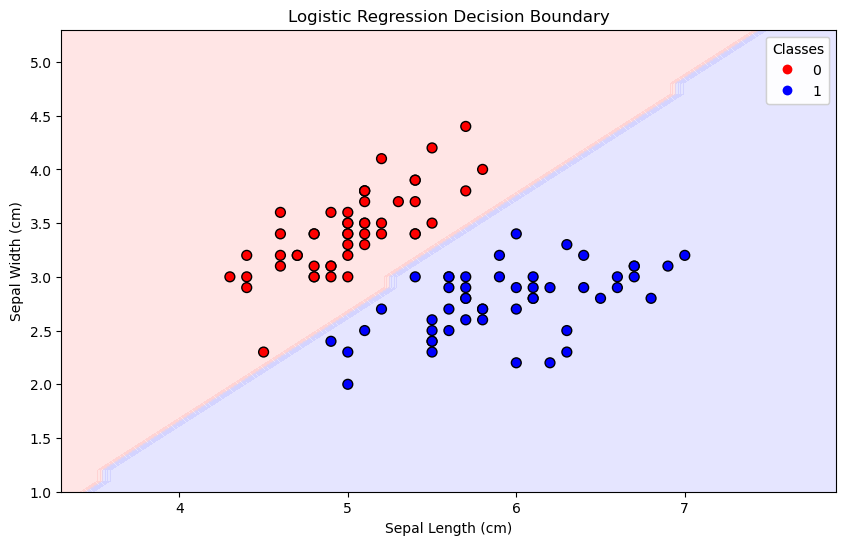

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
# Data for plotting
x = np.linspace(0, 10, 500)  # More points for smoother curves
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting both sine and cosine functions with different styles
ax.plot(x, y1, label='Sine Wave', color='magenta', linestyle='-', linewidth=2)
ax.plot(x, y2, label='Cosine Wave', color='cyan', linestyle='--', linewidth=2)

# Adding a title and labels with a custom font size
ax.set_xlabel('X-axis (0 to 10)', fontsize=12)
ax.set_ylabel('Y-axis (sin & cos)', fontsize=12)

# Adding gridlines and customizing them
ax.grid(True, linestyle=':', color='gray', alpha=0.5)

# Adding a legend
ax.legend(loc='upper right', fontsize=12)

# Adding annotations to highlight specific points
ax.annotate('Peak of Sine', xy=(np.pi/2, 1), xytext=(np.pi/2 + 1, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

ax.annotate('Zero Cross of Cosine', xy=(np.pi, 0), xytext=(np.pi + 0.5, -0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

# Setting the limits for both axes for better visualization
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

# Display the plot
plt.show()

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Select only two classes for binary classification (class 0 and class 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions on the grid points
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colormap
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Plot the decision boundary
ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k', s=50)

# Add title and labels
ax.set_title("Logistic Regression Decision Boundary")
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Show the plot
plt.show()


In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the variables
x, y = sp.symbols('x y')

# Define a single function to analyze
# f = x * y * sp.ln(x) + y**2  # Example function
f = x**3 -12*x*y +8*y**3
def analyze_function():
    # Compute the first partial derivatives (gradient)
    f_x = sp.diff(f, x)
    f_y = sp.diff(f, y)

    # Calculate the critical points by solving the system of equations f_x = 0 and f_y = 0
    critical_points = sp.solve([f_x, f_y], (x, y))

    # Compute the second partial derivatives (Hessian matrix components)
    f_xx = sp.diff(f_x, x)
    f_yy = sp.diff(f_y, y)
    f_xy = sp.diff(f_x, y)
    f_yx = sp.diff(f_y, x)

    # Construct the Hessian matrix
    Hessian = sp.Matrix([[f_xx, f_xy], [f_yx, f_yy]])

    # Display the function, gradient, Hessian, and classify the critical points
    print(f"Function: {f}")
    print(f"\nFirst Partial Derivatives (Gradient):")
    print(f"df/dx = {f_x}")
    print(f"df/dy = {f_y}")

    print("\nCritical Points:")
    for cp in critical_points:
        print(f"Critical Point: {cp}")

    print("\nHessian Matrix:")
    sp.pprint(Hessian, use_unicode=True)

    # Evaluate the Hessian at the critical points and classify them
    print("\nHessian at Critical Points:")
    for idx, cp in enumerate(critical_points):
        # Convert symbolic critical points to numerical values
        cp_numeric = {x: float(cp[0]), y: float(cp[1])}
        Hessian_at_cp = Hessian.subs(cp_numeric)
        print(f"Hessian at {cp}:")
        sp.pprint(Hessian_at_cp, use_unicode=True)

        # Classify the critical points using the second derivative test
        det_H = Hessian_at_cp.det()  # Determinant of Hessian
        f_xx_at_cp = Hessian_at_cp[0, 0]  # Second partial derivative w.r.t x at the critical point

        # Second derivative test
        if det_H > 0:
            if f_xx_at_cp > 0:
                print(f"Critical Point {cp} is a local minimum.")
            elif f_xx_at_cp < 0:
                print(f"Critical Point {cp} is a local maximum.")
        elif det_H < 0:
            print(f"Critical Point {cp} is a saddle point.")
        else:
            print(f"Critical Point {cp} is inconclusive (determinant is zero).")

    # Convert the function to a numerical form for plotting
    f_lambdified = sp.lambdify((x, y), f, "numpy")

    # Create a meshgrid for plotting
    x_vals = np.linspace(0.1, 3, 400)  # x starts at 0.1 to avoid log(0)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_lambdified(X, Y)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

    # Plot the critical points
    for cp in critical_points:
        x_val = float(cp[0])
        y_val = float(cp[1])
        z_val = f_lambdified(x_val, y_val)
        ax.scatter(x_val, y_val, z_val, color='r', s=100, label=f'Critical Point {cp}')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Surface plot of f(x, y) with Critical Points')

    # Show the plot
    plt.legend()
    plt.show()

# Call the function to analyze
analyze_function(f)


Function: x**3 - 12*x*y + 8*y**3

First Partial Derivatives (Gradient):
df/dx = 3*x**2 - 12*y
df/dy = -12*x + 24*y**2

Critical Points:
Critical Point: (0, 0)
Critical Point: (2, 1)
Critical Point: (2*(-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2)
Critical Point: (2*(-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)

Hessian Matrix:
⎡6⋅x  -12 ⎤
⎢         ⎥
⎣-12  48⋅y⎦

Hessian at Critical Points:
Hessian at (0, 0):
⎡ 0   -12⎤
⎢        ⎥
⎣-12   0 ⎦
Critical Point (0, 0) is a saddle point.
Hessian at (2, 1):
⎡12.0  -12 ⎤
⎢          ⎥
⎣-12   48.0⎦
Critical Point (2, 1) is a local minimum.


TypeError: Cannot convert complex to float


Analyzing function for a = 0
Function: x**3 + y**3

First Partial Derivatives (Gradient):
df/dx = 3*x**2
df/dy = 3*y**2

Critical Points:
Critical Point: (0, 0) (Real)

Hessian Matrix:
⎡6⋅x   0 ⎤
⎢        ⎥
⎣ 0   6⋅y⎦

Hessian at Real Critical Points:
Hessian at (0, 0):
⎡0  0⎤
⎢    ⎥
⎣0  0⎦
Critical Point (0, 0) is inconclusive (determinant is zero).


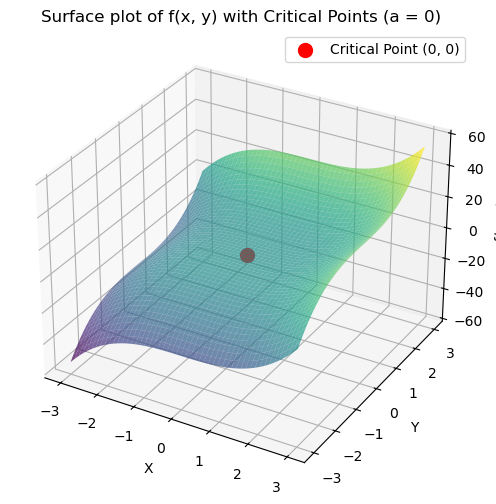


Analyzing function for a = 1
Function: x**3 - 3*x*y + y**3

First Partial Derivatives (Gradient):
df/dx = 3*x**2 - 3*y
df/dy = -3*x + 3*y**2

Critical Points:
Critical Point: (0, 0) (Real)
Critical Point: (1, 1) (Real)
Critical Point: ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2) (Complex)
Critical Point: ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2) (Complex)

Hessian Matrix:
⎡6⋅x  -3 ⎤
⎢        ⎥
⎣-3   6⋅y⎦

Hessian at Real Critical Points:
Hessian at (0, 0):
⎡0   -3⎤
⎢      ⎥
⎣-3  0 ⎦
Critical Point (0, 0) is a saddle point.
Hessian at (1, 1):
⎡6.0  -3 ⎤
⎢        ⎥
⎣-3   6.0⎦
Critical Point (1, 1) is a local minimum.


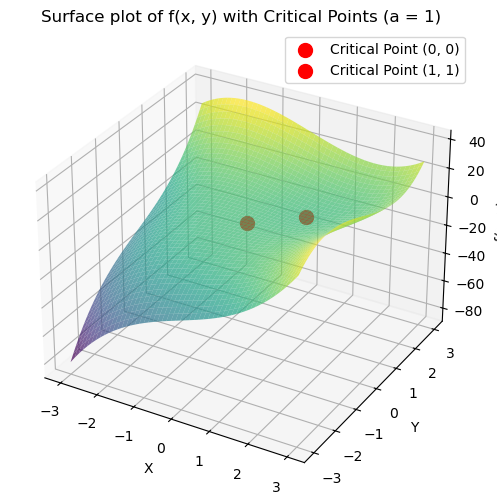


Analyzing function for a = 2
Function: x**3 - 6*x*y + y**3

First Partial Derivatives (Gradient):
df/dx = 3*x**2 - 6*y
df/dy = -6*x + 3*y**2

Critical Points:
Critical Point: (0, 0) (Real)
Critical Point: (2, 2) (Real)
Critical Point: ((-1 - sqrt(3)*I)**2/2, -1 - sqrt(3)*I) (Complex)
Critical Point: ((-1 + sqrt(3)*I)**2/2, -1 + sqrt(3)*I) (Complex)

Hessian Matrix:
⎡6⋅x  -6 ⎤
⎢        ⎥
⎣-6   6⋅y⎦

Hessian at Real Critical Points:
Hessian at (0, 0):
⎡0   -6⎤
⎢      ⎥
⎣-6  0 ⎦
Critical Point (0, 0) is a saddle point.
Hessian at (2, 2):
⎡12.0   -6 ⎤
⎢          ⎥
⎣ -6   12.0⎦
Critical Point (2, 2) is a local minimum.


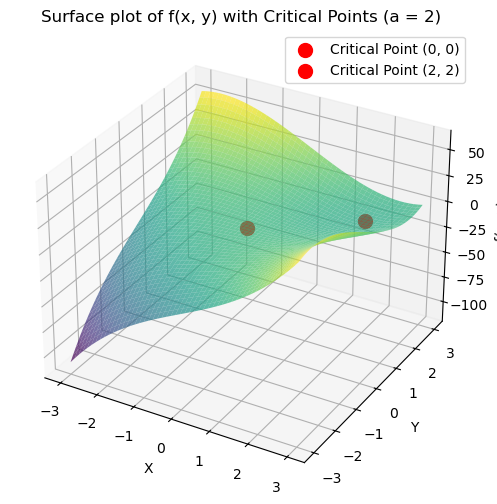


Analyzing function for a = 3
Function: x**3 - 9*x*y + y**3

First Partial Derivatives (Gradient):
df/dx = 3*x**2 - 9*y
df/dy = -9*x + 3*y**2

Critical Points:
Critical Point: (0, 0) (Real)
Critical Point: (3, 3) (Real)
Critical Point: ((-3/2 - 3*sqrt(3)*I/2)**2/3, -3/2 - 3*sqrt(3)*I/2) (Complex)
Critical Point: ((-3/2 + 3*sqrt(3)*I/2)**2/3, -3/2 + 3*sqrt(3)*I/2) (Complex)

Hessian Matrix:
⎡6⋅x  -9 ⎤
⎢        ⎥
⎣-9   6⋅y⎦

Hessian at Real Critical Points:
Hessian at (0, 0):
⎡0   -9⎤
⎢      ⎥
⎣-9  0 ⎦
Critical Point (0, 0) is a saddle point.
Hessian at (3, 3):
⎡18.0   -9 ⎤
⎢          ⎥
⎣ -9   18.0⎦
Critical Point (3, 3) is a local minimum.


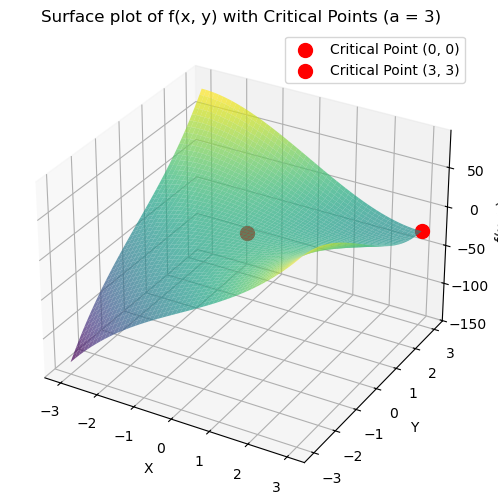

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the variables and parameter
x, y, a = sp.symbols('x y a')

# Define the function with parameter `a`
f = x**3 + y**3 - 3 * a * x * y  # Example function

def analyze_function(a_value):
    # Substitute the parameter `a` with a specific real value
    f_sub = f.subs(a, a_value)

    # Compute the first partial derivatives (gradient)
    f_x = sp.diff(f_sub, x)
    f_y = sp.diff(f_sub, y)

    # Calculate the critical points by solving the system of equations f_x = 0 and f_y = 0
    critical_points = sp.solve([f_x, f_y], (x, y))

    # Compute the second partial derivatives (Hessian matrix components)
    f_xx = sp.diff(f_x, x)
    f_yy = sp.diff(f_y, y)
    f_xy = sp.diff(f_x, y)
    f_yx = sp.diff(f_y, x)

    # Construct the Hessian matrix
    Hessian = sp.Matrix([[f_xx, f_xy], [f_yx, f_yy]])

    # Display the function, gradient, Hessian, and classify the critical points
    print(f"Function: {f_sub}")
    print(f"\nFirst Partial Derivatives (Gradient):")
    print(f"df/dx = {f_x}")
    print(f"df/dy = {f_y}")

    print("\nCritical Points:")
    real_critical_points = []
    for cp in critical_points:
        # Check if the critical point is real
        if all(coord.is_real for coord in cp):
            real_critical_points.append(cp)
            print(f"Critical Point: {cp} (Real)")
        else:
            print(f"Critical Point: {cp} (Complex)")

    print("\nHessian Matrix:")
    sp.pprint(Hessian, use_unicode=True)

    # Evaluate the Hessian at the real critical points and classify them
    print("\nHessian at Real Critical Points:")
    for idx, cp in enumerate(real_critical_points):
        # Convert symbolic critical points to numerical values
        cp_numeric = {x: float(cp[0]), y: float(cp[1])}
        Hessian_at_cp = Hessian.subs(cp_numeric)
        print(f"Hessian at {cp}:")
        sp.pprint(Hessian_at_cp, use_unicode=True)

        # Classify the critical points using the second derivative test
        det_H = Hessian_at_cp.det()  # Determinant of Hessian
        f_xx_at_cp = Hessian_at_cp[0, 0]  # Second partial derivative w.r.t x at the critical point

        # Second derivative test
        if det_H > 0:
            if f_xx_at_cp > 0:
                print(f"Critical Point {cp} is a local minimum.")
            elif f_xx_at_cp < 0:
                print(f"Critical Point {cp} is a local maximum.")
        elif det_H < 0:
            print(f"Critical Point {cp} is a saddle point.")
        else:
            print(f"Critical Point {cp} is inconclusive (determinant is zero).")

    # Convert the function to a numerical form for plotting
    f_lambdified = sp.lambdify((x, y), f_sub, "numpy")

    # Create a meshgrid for plotting
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_lambdified(X, Y)

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

    # Plot the real critical points
    for cp in real_critical_points:
        x_val = float(cp[0])
        y_val = float(cp[1])
        z_val = f_lambdified(x_val, y_val)
        ax.scatter(x_val, y_val, z_val, color='r', s=100, label=f'Critical Point {cp}')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Surface plot of f(x, y) with Critical Points (a = {a_value})')

    # Show the plot
    plt.legend()
    plt.show()

# Example: Call the function with different values of `a`
a_values = [0, 1, 2, 3]  # Example values for `a`
for a_value in a_values:
    print(f"\nAnalyzing function for a = {a_value}")
    analyze_function(a_value)
